In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_taret)=imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [3]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [5]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
import numpy as np
lengths=np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


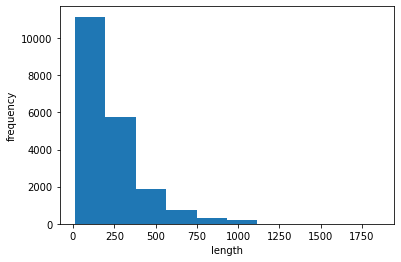

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input, maxlen=100)

In [12]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [20]:
val_seq=pad_sequences(val_input,maxlen=100)

In [15]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [16]:
train_oh=keras.utils.to_categorical(train_seq)

In [17]:
print(train_oh.shape)

(20000, 100, 500)


In [18]:
print(train_oh[0][0][0:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
val_oh=keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [34]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 50ms/step - loss: 0.4100 - accuracy: 0.8194 - val_loss: 0.4538 - val_accuracy: 0.7934
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.4088 - accuracy: 0.8185 - val_loss: 0.4558 - val_accuracy: 0.7906
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.4082 - accuracy: 0.8198 - val_loss: 0.4580 - val_accuracy: 0.7900
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.4069 - accuracy: 0.8209 - val_loss: 0.4537 - val_accuracy: 0.7908
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.4062 - accuracy: 0.8216 - val_loss: 0.4562 - val_accuracy: 0.7896
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.4047 - accuracy: 0.8210 - val_loss: 0.4543 - val_accuracy: 0.7936
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.4042 - accuracy: 0.8214 - val_loss: 0.4617 - val_ac

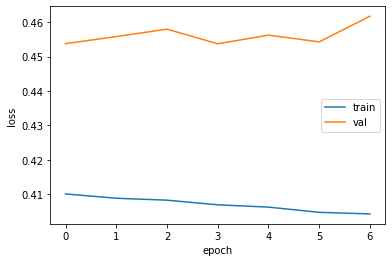

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [36]:
print(train_seq.shape, train_oh.nbytes)

(20000, 100) 4000000000


In [37]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [38]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [39]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6707 - accuracy: 0.5804 - val_loss: 0.6366 - val_accuracy: 0.6618
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6142 - accuracy: 0.6900 - val_loss: 0.6069 - val_accuracy: 0.6948
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5831 - accuracy: 0.7280 - val_loss: 0.5881 - val_accuracy: 0.7118
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5621 - accuracy: 0.7465 - val_loss: 0.5625 - val_accuracy: 0.7410
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5443 - accuracy: 0.7620 - val_loss: 0.5492 - val_accuracy: 0.7468
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5296 - accuracy: 0.7694 - val_loss: 0.5334 - val_accuracy: 0.7630
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5150 - accuracy: 0.7776 - val_loss: 0.5220 - val_accuracy:

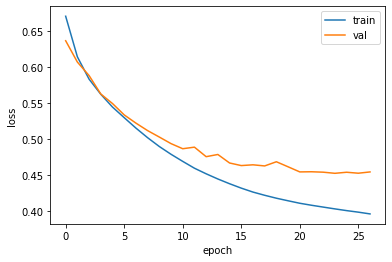

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 1s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input, maxlen=100)
val_seq=pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 41ms/step - loss: 0.6928 - accuracy: 0.5354 - val_loss: 0.6922 - val_accuracy: 0.5958
Epoch 2/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6913 - accuracy: 0.6046 - val_loss: 0.6902 - val_accuracy: 0.6228
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6882 - accuracy: 0.6334 - val_loss: 0.6858 - val_accuracy: 0.6488
Epoch 4/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6811 - accuracy: 0.6533 - val_loss: 0.6751 - val_accuracy: 0.6606
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6621 - accuracy: 0.6769 - val_loss: 0.6431 - val_accuracy: 0.6894
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6055 - accuracy: 0.7290 - val_loss: 0.5817 - val_accuracy: 0.7320
Epoch 7/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5675 - accuracy: 0.7435 - val_loss: 0.5617 - val_ac

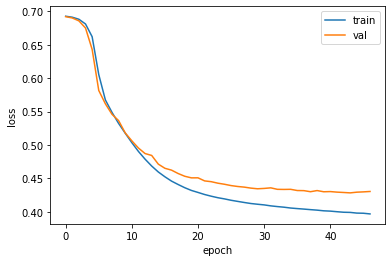

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 16s 43ms/step - loss: 0.6926 - accuracy: 0.5207 - val_loss: 0.6918 - val_accuracy: 0.5586
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6909 - accuracy: 0.5740 - val_loss: 0.6897 - val_accuracy: 0.5992
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6873 - accuracy: 0.6164 - val_loss: 0.6840 - val_accuracy: 0.6592
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6711 - accuracy: 0.6826 - val_loss: 0.6438 - val_accuracy: 0.7182
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6165 - accuracy: 0.7068 - val_loss: 0.5996 - val_accuracy: 0.7122
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5916 - accuracy: 0.7171 - val_loss: 0.5777 - val_accuracy: 0.7310
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5707 - accuracy: 0.7359 - val_loss: 0.5581 - val_ac

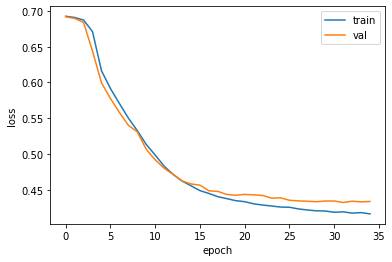

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
model3=keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 30s 83ms/step - loss: 0.6928 - accuracy: 0.5285 - val_loss: 0.6925 - val_accuracy: 0.5566
Epoch 2/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6917 - accuracy: 0.5504 - val_loss: 0.6905 - val_accuracy: 0.6140
Epoch 3/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6872 - accuracy: 0.6008 - val_loss: 0.6824 - val_accuracy: 0.5832
Epoch 4/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6545 - accuracy: 0.6118 - val_loss: 0.6195 - val_accuracy: 0.6978
Epoch 5/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5934 - accuracy: 0.7167 - val_loss: 0.5708 - val_accuracy: 0.7330
Epoch 6/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5558 - accuracy: 0.7411 - val_loss: 0.5391 - val_accuracy: 0.7430
Epoch 7/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5304 - accuracy: 0.7506 - val_loss: 0.5159 - val_ac

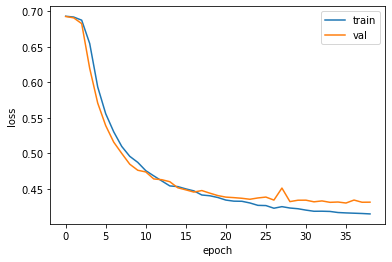

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
model4=keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

In [16]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 45ms/step - loss: 0.6925 - accuracy: 0.5257 - val_loss: 0.6919 - val_accuracy: 0.5508
Epoch 2/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6905 - accuracy: 0.5687 - val_loss: 0.6897 - val_accuracy: 0.5666
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6874 - accuracy: 0.5893 - val_loss: 0.6862 - val_accuracy: 0.5854
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6824 - accuracy: 0.6094 - val_loss: 0.6806 - val_accuracy: 0.5978
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6747 - accuracy: 0.6247 - val_loss: 0.6720 - val_accuracy: 0.6160
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6626 - accuracy: 0.6402 - val_loss: 0.6582 - val_accuracy: 0.6296
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6429 - accuracy: 0.6590 - val_loss: 0.6345 - val_ac

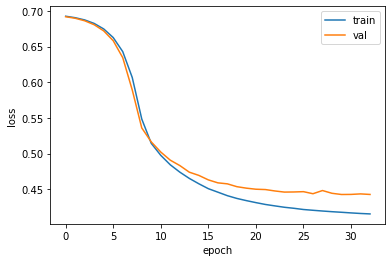

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()